# Cyber Attack Detection in IoT Systems

In [1]:
# library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Dataset Collection

In [2]:
# dataset import

Network_Traces=pd.read_csv("mainSimulationAccessTraces.csv")

In [168]:
Network_Traces

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,true,1520117997401,normal
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0,1520117998907,normal


In [169]:
Network_Traces['normality'].unique()

array(['normal', 'anomalous(scan)', 'anomalous(malitiousOperation)',
       'anomalous(DoSattack)', 'anomalous(spying)',
       'anomalous(dataProbing)', 'anomalous(wrongSetUp)',
       'anomalous(malitiousControl)'], dtype=object)

## Features and Labels Description

In [3]:
Features=Network_Traces.iloc[:,:-1]

In [4]:
Labels=Network_Traces.iloc[:,-1]

In [172]:
Labels.describe()

count     357952
unique         8
top       normal
freq      347935
Name: normality, dtype: object

In [173]:
Features.columns

Index(['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation',
       'destinationServiceAddress', 'destinationServiceType',
       'destinationLocation', 'accessedNodeAddress', 'accessedNodeType',
       'operation', 'value', 'timestamp'],
      dtype='object')

In [174]:
Features['sourceType'].unique()

array(['/lightControler', '/movementSensor', '/sensorService',
       '/batteryService', '/doorLockService', '/thermostat',
       '/washingService', '/smartPhone'], dtype=object)

In [175]:
Features['sourceLocation'].unique()

array(['BedroomParents', 'Dinningroom', 'BedroomChildren', 'Kitchen',
       'Garage', 'Bathroom', 'Livingroom', 'Watterroom', 'Bedroom',
       'Entrance', 'Showerroom', 'room_1', 'room_2', 'room_3', 'room_4',
       'room_5', 'room_6', 'room_7', 'room_9', 'room_8', 'room_10'],
      dtype=object)

In [176]:
Features['destinationServiceType'].unique()

array(['/lightControler', '/movementSensor', '/sensorService',
       '/batteryService', '/doorLockService', '/thermostat',
       '/washingService', '/smartPhone'], dtype=object)

In [177]:
Features['destinationLocation'].unique()

array(['BedroomParents', 'Dinningroom', 'BedroomChildren', 'Kitchen',
       'Garage', 'Bathroom', 'Livingroom', 'Watterroom', 'Bedroom',
       'Entrance', 'Showerroom', 'room_1', 'room_2', 'room_3', 'room_4',
       'room_5', 'room_6', 'room_7', 'room_9', 'room_8', 'room_10'],
      dtype=object)

In [178]:
Features['accessedNodeType'].unique()

array(['/lightControler', '/movementSensor', '/sensorService',
       '/derived/boolean', '/basic/number', '/batteryService',
       '/doorLockService', '/thermostat', '/washingService',
       '/basic/text', '/smartPhone', nan, '/basic/composed'], dtype=object)

In [179]:
Features['operation'].unique()

array(['registerService', 'write', 'read', 'subscribe', 'lockSubtree'],
      dtype=object)

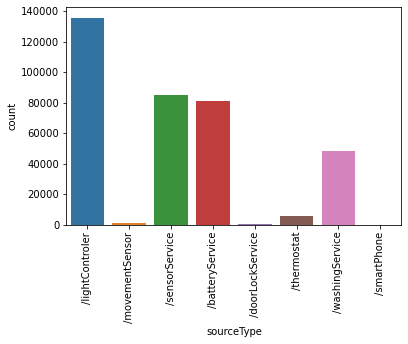

In [180]:
sns.countplot(Features.sourceType)
plt.xticks(rotation=90)
plt.show()

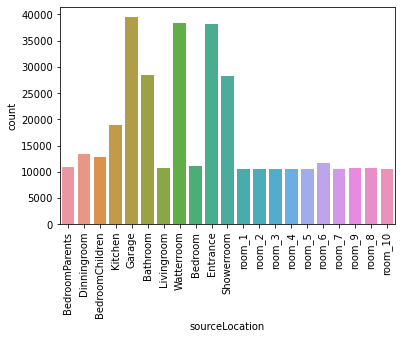

In [181]:
sns.countplot(Features.sourceLocation)
plt.xticks(rotation=90)
plt.show()

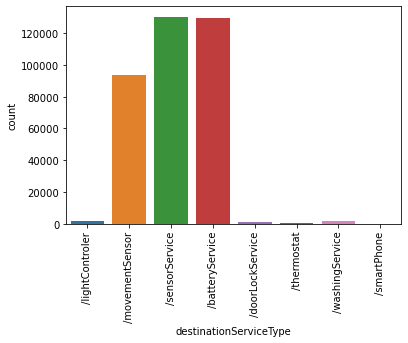

In [182]:
sns.countplot(Features.destinationServiceType)
plt.xticks(rotation=90)
plt.show()

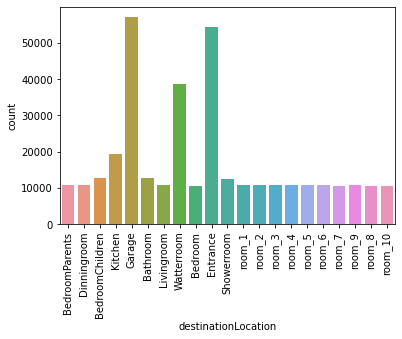

In [183]:
sns.countplot(Features.destinationLocation)
plt.xticks(rotation=90)
plt.show()

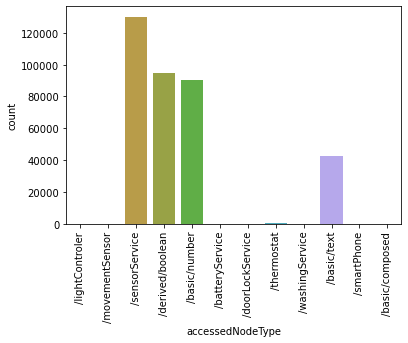

In [184]:
sns.countplot(Features.accessedNodeType)
plt.xticks(rotation=90)
plt.show()

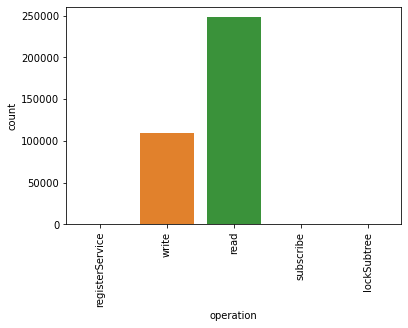

In [185]:
sns.countplot(Features['operation'])
plt.xticks(rotation=90)
plt.show()

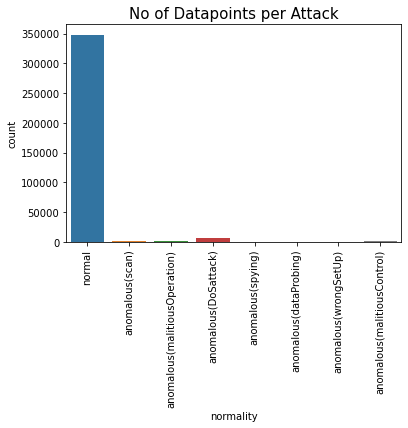

In [186]:
plt.title('No of Datapoints per Attack', fontsize=15)
sns.countplot(Network_Traces.normality)
plt.xticks(rotation=90)
plt.show()

In [187]:
Network_Traces['normality'].value_counts()

normal                           347935
anomalous(DoSattack)               5780
anomalous(scan)                    1547
anomalous(malitiousControl)         889
anomalous(malitiousOperation)       805
anomalous(spying)                   532
anomalous(dataProbing)              342
anomalous(wrongSetUp)               122
Name: normality, dtype: int64

# Data Preprocessing

In [5]:
Features.value[Features.value=='true']=np.nan
Features.value[Features.value=='none']=np.nan
Features.value[Features.value=='false']=np.nan
Features.value[Features.value=='twenty']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@463d9146']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@699d52f5']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@273343f8']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@181ae4a8']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@5c494e7d']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@6876d7bb ']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@4ff97c45']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@3ebb34ed']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@2c82b391']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@61ba9b2b']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@715cced']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@6876d7bb']=np.nan


In [6]:
Features['value']=pd.to_numeric(Features['value'])

### Handling the Missing Values

In [7]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='constant',verbose=0)
imputer=imputer.fit(Features.iloc[:,[8]])
Features.iloc[:,[8]]=imputer.transform(Features.iloc[:,[8]])

In [8]:
imputer1=SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
imputer1=imputer1.fit(Features.iloc[:,[10]])
Features.iloc[:,[10]]=imputer1.transform(Features.iloc[:,[10]])

In [192]:
Features

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,2.775431e+09,1520031600000
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,2.775431e+09,1520031603269
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,2.775431e+09,1520031603279
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,2.775431e+09,1520031603290
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,2.775431e+09,1520031603464
...,...,...,...,...,...,...,...,...,...,...,...,...
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,2.034790e+01,1520117997001
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9.000000e+00,1520117997339
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,2.775431e+09,1520117997401
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0.000000e+00,1520117998907


## Label Encoding the Categorical Data

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in range(0,10):
    Features.iloc[:,i] = labelencoder_X.fit_transform(Features.iloc[:,i])

In [10]:
Features=Features.drop(columns='timestamp')
Features=Features.drop(columns='sourceID')

In [11]:
X=np.array(Features,dtype=np.float)
y=labelencoder_X.fit_transform(Labels)

In [12]:
from collections import Counter

In [13]:
items = Counter(y).keys()

In [14]:
from sklearn.model_selection import train_test_split
 
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (250566, 10)
Number transactions y_train dataset:  (250566,)
Number transactions X_test dataset:  (107386, 10)
Number transactions y_test dataset:  (107386,)


## Training the models before handling class imbalance problems

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import confusion_matrix, accuracy_score
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
from datetime import datetime
test_start_time = datetime.now()
pred = clf.predict(X_test)
test_end_time = datetime.now()
print("Accuracy:",accuracy_score(y_test, pred))
print("Testing Time is" + str(test_end_time-test_start_time))

Accuracy: 0.9940495036596949
Testing Time is0:00:00.046877


### Random Forest

In [37]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

rf.fit(X_train,y_train)

from datetime import datetime
test_start_time = datetime.now()
pred = rf.predict(X_test)
test_end_time = datetime.now()
print("Accuracy:",accuracy_score(y_test, pred))
print("Testing Time is" + str(test_end_time-test_start_time))

Accuracy: 0.9940588158605405
Testing Time is0:00:02.781029


### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
test_start_time = datetime.now()
y_pred=logreg.predict(X_test)
test_end_time = datetime.now()
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Testing Time is" + str(test_end_time-test_start_time))

Accuracy: 0.9838712681355112
Testing Time is0:00:00.031249


### SVM

In [39]:
from sklearn import svm
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
test_start_time = datetime.now()
y_pred=rbf.predict(X_test)
test_end_time = datetime.now()
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Testing Time is" + str(test_end_time-test_start_time))

Accuracy: 0.9934814594081165
Testing Time is0:03:13.432744


### Handling the class imbalance problem

###  Using SMOTE Algorithm

In [17]:
# import SMOTE module from imblearn library
# !pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [41]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(y_train == 3)))
print("Before OverSampling, counts of label '4': {} \n".format(sum(y_train == 4)))
print("Before OverSampling, counts of label '5': {} \n".format(sum(y_train == 5)))
print("Before OverSampling, counts of label '6': {} \n".format(sum(y_train == 6)))
print("Before OverSampling, counts of label '7': {} \n".format(sum(y_train == 7)))


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res == 4)))
print("After OverSampling, counts of label '5': {}".format(sum(y_train_res == 5)))
print("After OverSampling, counts of label '6': {}".format(sum(y_train_res == 6)))
print("After OverSampling, counts of label '7': {}".format(sum(y_train_res == 7)))



Before OverSampling, counts of label '0': 4045
Before OverSampling, counts of label '1': 237 

Before OverSampling, counts of label '2': 618 

Before OverSampling, counts of label '3': 567 

Before OverSampling, counts of label '4': 1102 

Before OverSampling, counts of label '5': 370 

Before OverSampling, counts of label '6': 93 

Before OverSampling, counts of label '7': 243534 

After OverSampling, the shape of train_X: (1948272, 10)
After OverSampling, the shape of train_y: (1948272,) 

After OverSampling, counts of label '0': 243534
After OverSampling, counts of label '1': 243534
After OverSampling, counts of label '2': 243534
After OverSampling, counts of label '3': 243534
After OverSampling, counts of label '4': 243534
After OverSampling, counts of label '5': 243534
After OverSampling, counts of label '6': 243534
After OverSampling, counts of label '7': 243534


## The New Training data is X_train_res, y_train_res   and test it on X_test and y_test

## Training the Model

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_res,y_train_res)

#
test_start_time = datetime.now()
y_pred=logreg.predict(X_test)
test_end_time = datetime.now()
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Testing Time is" + str(test_end_time-test_start_time))
confusion_matrix(y_test, y_pred)

Accuracy: 0.20610694131451027
Testing Time is0:00:00.328102


array([[ 1125,     0,     0,     0,     0,     0,   610,     0],
       [    0,    90,     0,    15,     0,     0,     0,     0],
       [    0,     0,   252,     4,     0,     3,    12,     0],
       [    0,     0,    26,   212,     0,     0,     0,     0],
       [    7,     0,    10,     3,   304,    60,    12,    49],
       [    0,     0,     0,    10,     7,   144,     0,     1],
       [    0,     0,     0,     0,     0,     0,    29,     0],
       [ 6413,  8073,  8563, 13735, 26172, 18914,  2554, 19977]],
      dtype=int64)

### Decision Trees

In [44]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import confusion_matrix, accuracy_score
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_res,y_train_res)
from datetime import datetime
test_start_time = datetime.now()
pred = clf.predict(X_test)
test_end_time = datetime.now()
print("Accuracy:",accuracy_score(y_test, pred))
print("Testing Time is" + str(test_end_time-test_start_time))
confusion_matrix(y_test, pred)

Accuracy: 0.7456186095021697
Testing Time is0:00:00.062496


array([[  590,     0,     0,     0,   610,     0,     0,   535],
       [    0,    15,     0,     0,     0,     0,    31,    59],
       [    0,     0,    12,     0,     3,     0,     0,   256],
       [    0,     0,     0,    83,    42,     0,    26,    87],
       [    8,     0,     0,     0,   349,     0,     0,    88],
       [    8,     0,    15,     0,     0,    79,     0,    60],
       [   29,     0,     0,     0,     0,     0,     0,     0],
       [   53,    45,    65,    31, 15077,  1915,  8274, 78941]],
      dtype=int64)

### 1. Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from datetime import datetime

classifier_rf = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 42)
start = datetime.now() 
classifier_rf.fit(X_train_res, y_train_res)
stop = datetime.now()

In [204]:
#Execution time of the model 
execution_time_rf = stop-start 
execution_time_rf

datetime.timedelta(seconds=69, microseconds=331671)

In [205]:
y_pred = classifier_rf.predict(X_test)
y_pred

array([7, 7, 7, ..., 7, 7, 7])

In [206]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  1735      0      0      0      0      0      0      0]
 [     0    105      0      0      0      0      0      0]
 [     0      0    271      0      0      0      0      0]
 [     0      0      0    238      0      0      0      0]
 [     0      0      0      0    445      0      0      0]
 [     0      0      0      0      0    162      0      0]
 [     0      0      0      0      0      0     29      0]
 [  1282      0      0      0      2      0      0 103117]]


In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.575075  1.000000  0.730219      1735
           1   1.000000  1.000000  1.000000       105
           2   1.000000  1.000000  1.000000       271
           3   1.000000  1.000000  1.000000       238
           4   0.995526  1.000000  0.997758       445
           5   1.000000  1.000000  1.000000       162
           6   1.000000  1.000000  1.000000        29
           7   1.000000  0.987701  0.993813    104401

    accuracy                       0.988043    107386
   macro avg   0.946325  0.998463  0.965224    107386
weighted avg   0.993116  0.988043  0.989617    107386



In [208]:
from sklearn.metrics import accuracy_score 
accuracy_rf = accuracy_score(y_test, y_pred) 
accuracy_rf

0.9880431341143165

# Deep Learning Models

In [238]:
y_train_res1 = np.where(y_train_res > 0, 1, 0)
y_test1 = np.where(y_test > 0, 1, 0)
y_train_res1

array([1, 0, 1, ..., 1, 1, 1])

In [239]:
X_train = np.reshape(X_train_res, (X_train_res.shape[0], 1, X_train_res.shape[1]))
X_test1 = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [240]:
X_test1.shape

(107386, 1, 10)

In [241]:
pip install np_utils

In [242]:
from keras.utils.np_utils import to_categorical

In [243]:
y_train_dummy = to_categorical(y_train_res)
y_test_dummy = to_categorical(y_test)

In [244]:
y_train_dummy.shape

(1948272, 8)

In [245]:
X_train.shape

(1948272, 1, 10)

In [246]:
len(y_test_dummy)

107386

## 1D CNN

In [247]:
from keras.layers import Conv1D

In [248]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1,10)))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', padding = 'same'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2 , padding='same'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [249]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 1, 64)             704       
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 1, 64)             4160      
_________________________________________________________________
dropout_36 (Dropout)         (None, 1, 64)             0         
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_16 (Dense)             (None, 8)               

In [250]:
# fit network
history = model.fit(X_train, y_train_dummy, validation_data=(X_test1, y_test_dummy), 
                    epochs=10, batch_size=512,verbose=1)


# evaluate model
(loss, accuracy) = model.evaluate(X_test1, y_test_dummy, batch_size=512, verbose=verbose)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

Epoch 1/10
3806/3806 [==============================] - 189s 49ms/step - loss: 0.0739 - accuracy: 0.9795 - val_loss: 0.0476 - val_accuracy: 0.9872
Epoch 2/10
3806/3806 [==============================] - 173s 46ms/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.0412 - val_accuracy: 0.9880
Epoch 3/10
3806/3806 [==============================] - 170s 45ms/step - loss: 0.0074 - accuracy: 0.9984 - val_loss: 0.0404 - val_accuracy: 0.9879
Epoch 4/10
3806/3806 [==============================] - 162s 43ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.0408 - val_accuracy: 0.9880
Epoch 5/10
3806/3806 [==============================] - 159s 42ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.0405 - val_accuracy: 0.9880
Epoch 6/10
3806/3806 [==============================] - 177s 47ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0448 - val_accuracy: 0.9880
Epoch 7/10
3806/3806 [==============================] - 179s 47ms/step - loss: 0.0069 - accuracy: 0.9984 - val_loss: 0

NameError: name 'verbose' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

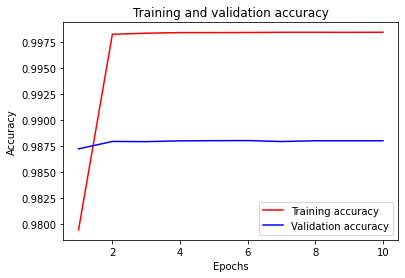

In [252]:
import matplotlib.pyplot as plt
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss=history_dict['loss']
val_loss=history_dict['val_loss']
# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

## Stacking Machine Learning Models

In [21]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
clf = [dtc,rfc,xgb]
for algo in clf:
    score = cross_val_score( algo,X_train_res,y_train_res,cv = 5,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())

In [24]:
clf = [('dtc',dtc),('rfc',rfc)] #list of (str, estimator)

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from datetime import datetime

In [ ]:
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)
start=datetime.now()
score = cross_val_score(stack_model,X_train_res,y_train_res,cv = 5,scoring = 'accuracy')
end=datetime.now()
print("The accuracy score is:",score.mean())
print("The Training time is:", end-start)